In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import platform as pf
from matplotlib import font_manager
from matplotlib import rc
import time

plt.rcParams['axes.unicode_minus'] = False
path = "c:/windows/Fonts/malgun.ttf" 
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)

file_name = '상권_매유상점'#<-- 얘도 수정해조
com_dist_df_org = pd.read_csv('../data/algorithm/20201105_상권_추정매출_유동인구_상주인구_최종_태석보내기전.csv'
                              , encoding='utf-8'
                             , header=0)
com_dist_df = com_dist_df_org.copy()
com_dist_df.head()

,유니크_코드,시계열_코드,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포수,총_유동인구_수,총_상주인구_수
0,2015_00Q_1001496,201500,2015,0,관광특구,강남 마이스 관광특구,통신판매업,2.848891e+08,5650,9,145076.0,0.0
1,2015_00Q_1001496,201500,2015,0,관광특구,강남 마이스 관광특구,주방·가정용품,1.202180e+09,38012,10,145076.0,0.0
2,2015_00Q_1001496,201500,2015,0,관광특구,강남 마이스 관광특구,가구·가전,1.201508e+08,619,16,145076.0,0.0
3,2015_00Q_1001496,201500,2015,0,관광특구,강남 마이스 관광특구,화초·애완,3.175914e+08,12275,4,145076.0,0.0
4,2015_00Q_1001496,201500,2015,0,관광특구,강남 마이스 관광특구,섬유제품,2.646108e+10,457538,31,145076.0,0.0


In [33]:
com_dist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812891 entries, 0 to 812890
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   유니크_코드       812891 non-null  object 
 1   시계열_코드       812891 non-null  int64  
 2   기준_년_코드      812891 non-null  int64  
 3   기준_분기_코드     812891 non-null  int64  
 4   상권_구분_코드_명   812891 non-null  object 
 5   상권_코드_명      812891 non-null  object 
 6   서비스_업종_코드_명  812891 non-null  object 
 7   당월_매출_금액     812891 non-null  float64
 8   당월_매출_건수     812891 non-null  int64  
 9   점포수          812891 non-null  int64  
 10  총_유동인구_수     812891 non-null  float64
 11  총_상주인구_수     812891 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 74.4+ MB


In [34]:
com_dist_df.isnull().sum().sort_values(ascending=False)

총_상주인구_수       0
총_유동인구_수       0
점포수            0
당월_매출_건수       0
당월_매출_금액       0
서비스_업종_코드_명    0
상권_코드_명        0
상권_구분_코드_명     0
기준_분기_코드       0
기준_년_코드        0
시계열_코드         0
유니크_코드         0
dtype: int64

In [35]:
com_dist_df.columns

Index(['유니크_코드', '시계열_코드', '기준_년_코드', '기준_분기_코드', '상권_구분_코드_명', '상권_코드_명',
       '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '점포수', '총_유동인구_수', '총_상주인구_수'],
      dtype='object')

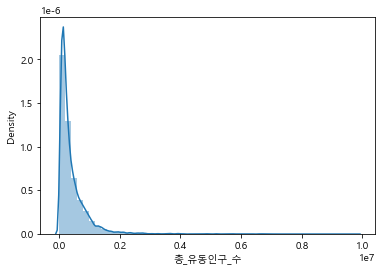

In [36]:
sns.distplot(com_dist_df['총_유동인구_수'])

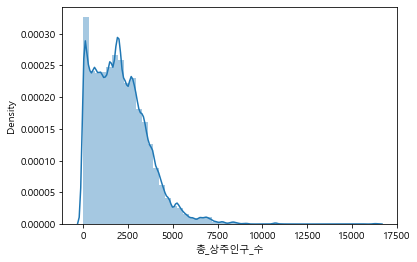

In [37]:
sns.distplot(com_dist_df['총_상주인구_수'])

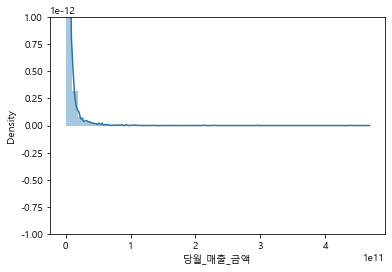

In [38]:
sns.distplot(com_dist_df['당월_매출_금액'])

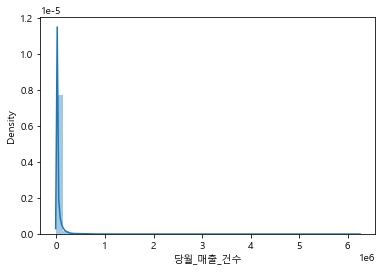

In [39]:
sns.distplot(com_dist_df['당월_매출_건수'])

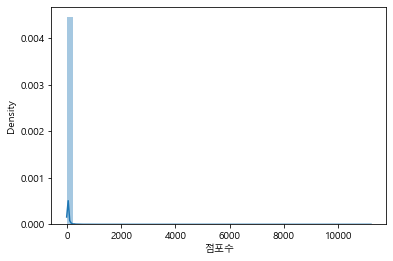

In [40]:
sns.distplot(com_dist_df['점포수'])

In [41]:
'''log1p 할 컬럼들 표현'''

print('시작' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
start_time = time.time()



col_h2_log = ['당월_매출_금액', '당월_매출_건수', '점포수', '총_유동인구_수', '총_상주인구_수'] #<--- 얘 수정해주세요




시작 2020-11-05 03:14:11 PM


log1p 시작 2020-11-05 03:14:11 PM
log1p 끝 2020-11-05 03:14:11 PM
걸린시간 :  0.13181114196777344


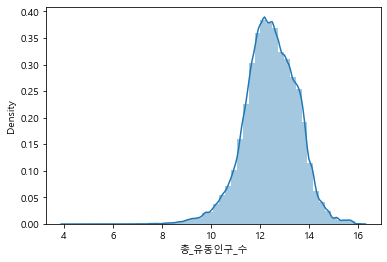

In [42]:
print('log1p 시작' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))

for col_nm in col_h2_log:
    com_dist_df[col_nm] = np.log1p(com_dist_df[col_nm])

print('log1p 끝' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
end_time = time.time()
print ('걸린시간 : ', end_time - start_time)


sns.distplot(com_dist_df['총_유동인구_수'])

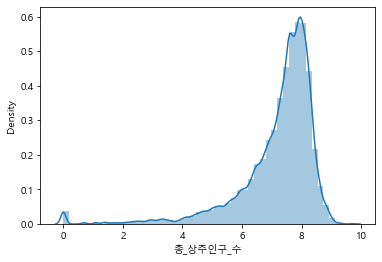

In [43]:
sns.distplot(com_dist_df['총_상주인구_수'])

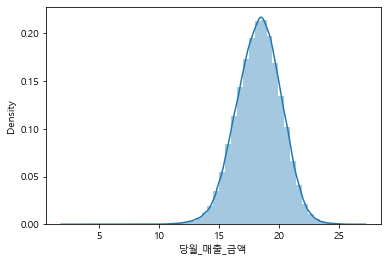

In [44]:
sns.distplot(com_dist_df['당월_매출_금액'])

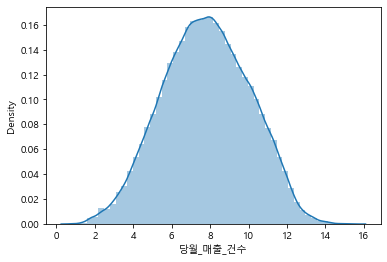

In [45]:
sns.distplot(com_dist_df['당월_매출_건수'])

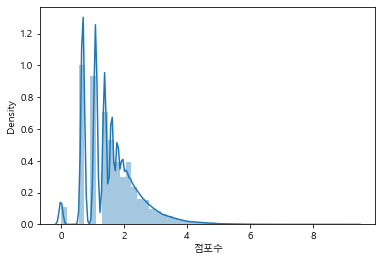

In [46]:
sns.distplot(com_dist_df['점포수'])

In [47]:
'''필요없는 컬럼 드랍'''

com_dist_df.drop('유니크_코드', axis=1, inplace=True)
# com_dist_df.drop('상권_구분_코드', axis=1, inplace=True)
# com_dist_df.drop('서비스_업종_코드', axis=1, inplace=True)
# com_dist_df.drop('상권_코드', axis=1, inplace=True)


In [48]:
'''원핫 인코딩'''

com_dist_df_ohe = pd.get_dummies(com_dist_df)

In [49]:
com_dist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812891 entries, 0 to 812890
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   시계열_코드       812891 non-null  int64  
 1   기준_년_코드      812891 non-null  int64  
 2   기준_분기_코드     812891 non-null  int64  
 3   상권_구분_코드_명   812891 non-null  object 
 4   상권_코드_명      812891 non-null  object 
 5   서비스_업종_코드_명  812891 non-null  object 
 6   당월_매출_금액     812891 non-null  float64
 7   당월_매출_건수     812891 non-null  float64
 8   점포수          812891 non-null  float64
 9   총_유동인구_수     812891 non-null  float64
 10  총_상주인구_수     812891 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 68.2+ MB


In [50]:
cols = com_dist_df_ohe.columns
for col in cols:
    print("'"+col+"'", end=',')

'시계열_코드','기준_년_코드','기준_분기_코드','당월_매출_금액','당월_매출_건수','점포수','총_유동인구_수','총_상주인구_수','상권_구분_코드_명_골목상권','상권_구분_코드_명_관광특구','상권_구분_코드_명_발달상권','상권_구분_코드_명_전통시장','상권_코드_명_가락시장','상권_코드_명_가로공원로58길','상권_코드_명_가로공원로76가길','상권_코드_명_가로공원로80길','상권_코드_명_가리봉시장','상권_코드_명_가마산로61길','상권_코드_명_가산디지털단지역_1','상권_코드_명_가산디지털단지역_2','상권_코드_명_가산디지털단지역_3','상권_코드_명_가산로3길','상권_코드_명_가산로5길','상권_코드_명_가재울로6길','상권_코드_명_가좌로7길','상권_코드_명_갈현로1길','상권_코드_명_갈현로33길','상권_코드_명_갈현로41길','상권_코드_명_갈현로7길','상권_코드_명_갈현시장','상권_코드_명_강남 마이스 관광특구','상권_코드_명_강남개포시장','상권_코드_명_강남골목시장','상권_코드_명_강남구 논현역_1','상권_코드_명_강남구 논현역_2','상권_코드_명_강남구 논현역_3','상권_코드_명_강남구 논현역_4','상권_코드_명_강남구 신사역_1','상권_코드_명_강남구 신사역_2','상권_코드_명_강남대로118길','상권_코드_명_강남대로136길','상권_코드_명_강남대로140길','상권_코드_명_강남대로23길','상권_코드_명_강남대로34길','상권_코드_명_강남대로8길','상권_코드_명_강남시장_강남','상권_코드_명_강남시장_동작','상권_코드_명_강동대로53길','상권_코드_명_강북종합시장','상권_코드_명_강서구청','상권_코드_명_강서로15길','상권_코드_명_강서로17가길','상권_코드_명_강서로18길','상권_코드_명_강서로29길','상권_코드_명_강서로35길','상권_코드_명_강서로45길','상권_코드_명_강서로45다길','상권_코드_명_강서로47길','상권_코드_명_강서로47라길','상권_

In [51]:
com_dist_df.isnull().sum().sort_values(ascending=False)

총_상주인구_수       0
총_유동인구_수       0
점포수            0
당월_매출_건수       0
당월_매출_금액       0
서비스_업종_코드_명    0
상권_코드_명        0
상권_구분_코드_명     0
기준_분기_코드       0
기준_년_코드        0
시계열_코드         0
dtype: int64

In [52]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print('{0} 로그변환된 RMSE : {1}'.format(model.__class__.__name__
                                        ,np.round(rmse,3)))
    return rmse

In [53]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [54]:
def get_top_botm_coef(model):
    coef = pd.Series(model.coef_, index=X_data.columns)
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low
    

In [55]:
def visualize_coef(models_p):
    fig, axs = plt.subplots(figsize=(16, 9), nrows=1, ncols=2)
    fig.tight_layout()
    
    for i_num, model in enumerate(models_p):
        coef_high, coef_low = get_top_botm_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i_num].set_title(  model.__class__.__name__ + 'Coefficents'
                             , size=25)
        axs[i_num].tick_params(  axis='y'
                               , direction='in'
                               , pad=-120)
        for label in ( axs[i_num].get_xticklabels() 
                      + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(  x=coef_concat.values
                    , y=coef_concat.index
                    , ax=axs[i_num])
        
        

In [56]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models_p):
    import time
    for model in models_p:
        print('get_avg_rmse_cv시작' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
        start_time = time.time()
        rmse_list = np.sqrt(-cross_val_score(model
                                             , X_data
                                             , y_target
                                             , scoring = 'neg_mean_squared_error'
                                             , cv=5))
        rmse_avg = np.mean(rmse_list)
        
        model_name = model.__class__.__name__
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model_name
                                                , np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model_name
                                             , np.round(rmse_avg, 3)))
        end_time = time.time()
        print('걸린시간 : ' +str(end_time - start_time))
        

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_data = com_dist_df_ohe.drop('당월_매출_금액' #<--- 변경해줘야댐
                              , axis=1
                              , inplace=False)
y_target = com_dist_df_ohe['당월_매출_금액'] #<--- 변경해줘야댐

X_train = X_data[X_data['기준_년_코드']!=2020]
X_test = X_data[X_data['기준_년_코드']==2020]
y_train = y_target[X_data['기준_년_코드']!=2020]
y_test = y_target[X_data['기준_년_코드']==2020]

print('릿지시작' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
start_time = time.time()

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

end_time = time.time()
print('릿지끝' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
print('걸린시간 : ' +str(end_time - start_time))


print('라소시작' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
start_time = time.time()

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

end_time = time.time()
print('릿지끝' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
print('걸린시간 : ' +str(end_time - start_time))


print('get_rmses시작' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
start_time = time.time()

models = [ridge_reg, lasso_reg]
get_rmses(models)

end_time = time.time()
print('get_rmses끝' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
print('걸린시간 : ' +str(end_time - start_time))

릿지시작 2020-11-05 03:15:00 PM
릿지끝 2020-11-05 03:15:56 PM
걸린시간 : 56.12210392951965
라소시작 2020-11-05 03:15:56 PM
릿지끝 2020-11-05 03:16:38 PM
걸린시간 : 41.95719528198242
get_rmses시작 2020-11-05 03:16:38 PM
Ridge 로그변환된 RMSE : 0.713
Lasso 로그변환된 RMSE : 1.168
get_rmses끝 2020-11-05 03:16:41 PM
걸린시간 : 2.6545331478118896


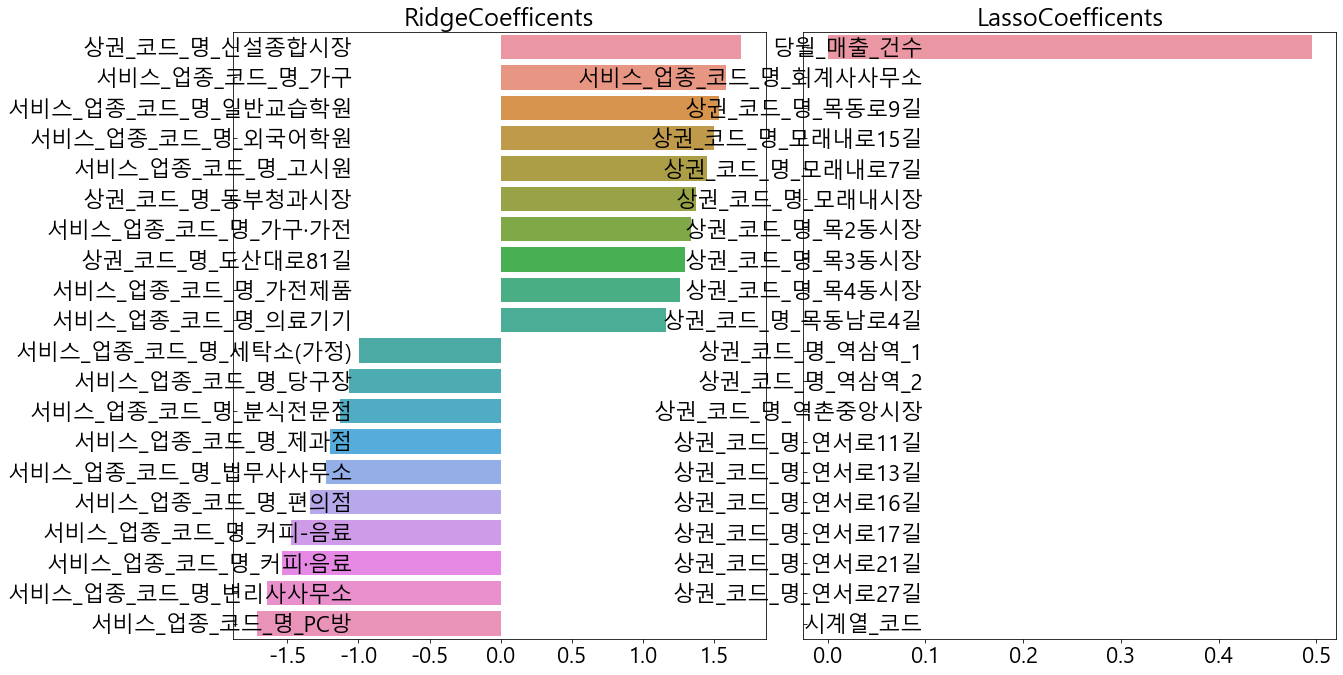

In [58]:
models = [ridge_reg, lasso_reg]
visualize_coef(models)

In [59]:
models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

get_avg_rmse_cv시작 2020-11-05 03:16:50 PM

Ridge CV RMSE 값 리스트: [0.626 0.646 0.654 0.642 0.642]
Ridge CV 평균 RMSE 값: 0.642
걸린시간 : 169.4858090877533
get_avg_rmse_cv시작 2020-11-05 03:19:39 PM

Lasso CV RMSE 값 리스트: [1.107 1.099 1.11  1.117 1.104]
Lasso CV 평균 RMSE 값: 1.107
걸린시간 : 367.833589553833


In [60]:
from sklearn.model_selection import GridSearchCV

def get_best_estimator_(model_p, params_p, X_data_p, y_target_p):
    import time
    print(str(model_p.__class__.__name__)+'cv 시작' ,time.strftime('%Y-%m-%d %I:%M:%S %p', time.localtime()))
    start_time = time.time()
    grid_model = GridSearchCV(model_p, param_grid=params_p, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_data_p, y_target_p)
    
    rmse = np.sqrt(-grid_model.best_score_)
    model_name = model_p.__class__.__name__
    print('{0} 5CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(model_name, np.round(rmse, 4), grid_model.best_params_))
    end_time = time.time()
    
    print('걸린시간 : ' +str(end_time - start_time))
    return grid_model.best_estimator_, grid_model.best_params_

In [61]:
ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10 ,12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.03, 0.05, 0.1, 0.5, 1, 5, 10]}


best_ridge, best_ridge_param = get_best_estimator_(  ridge_reg
                                                    , ridge_params
                                                    , X_data
                                                    , y_target)

best_lasso, best_lasso_param = get_best_estimator_(  lasso_reg
                                                    , lasso_params
                                                    , X_data
                                                    , y_target)


Ridgecv 시작 2020-11-05 03:25:54 PM
Ridge 5CV 시 최적 평균 RMSE 값: 0.6421, 최적 alpha: {'alpha': 5}
걸린시간 : 1534.456511259079
Lassocv 시작 2020-11-05 03:51:28 PM
Lasso 5CV 시 최적 평균 RMSE 값: 0.6844, 최적 alpha: {'alpha': 0.001}
걸린시간 : 2872.308533191681


In [62]:
import pickle
import joblib
import time


tm = time.localtime()
time_string = time.strftime('%Y-%m-%d-%I-%M-%S', tm)
joblib.dump(best_ridge
            , '../model/'
            + best_ridge.__class__.__name__ 
            + '-alpha-'
            + str(best_ridge_param['alpha'])
            + '-'
            + time_string 
            + file_name
            + '.jbl')

f = open('../model/'
            + best_ridge.__class__.__name__ 
            + '-alpha-'
            + str(best_ridge_param['alpha'])
            + '-'
            + time_string 
            + file_name
            + '.pkl', 'wb')
pickle.dump(best_ridge,f)
f.close()



tm = time.localtime()
time_string = time.strftime('%Y-%m-%d-%I-%M-%S', tm)
joblib.dump(best_lasso
            , '../model/'
            + best_lasso.__class__.__name__ 
            + '-alpha-'
            + str(best_lasso_param['alpha'])
            + '-'
            + time_string 
            + file_name
            + '.jbl')

f = open('../model/'
            + best_lasso.__class__.__name__ 
            + '-alpha-'
            + str(best_lasso_param['alpha'])
            + '-'
            + time_string 
            + file_name
            + '.pkl', 'wb')
pickle.dump(best_lasso,f)
f.close()
        

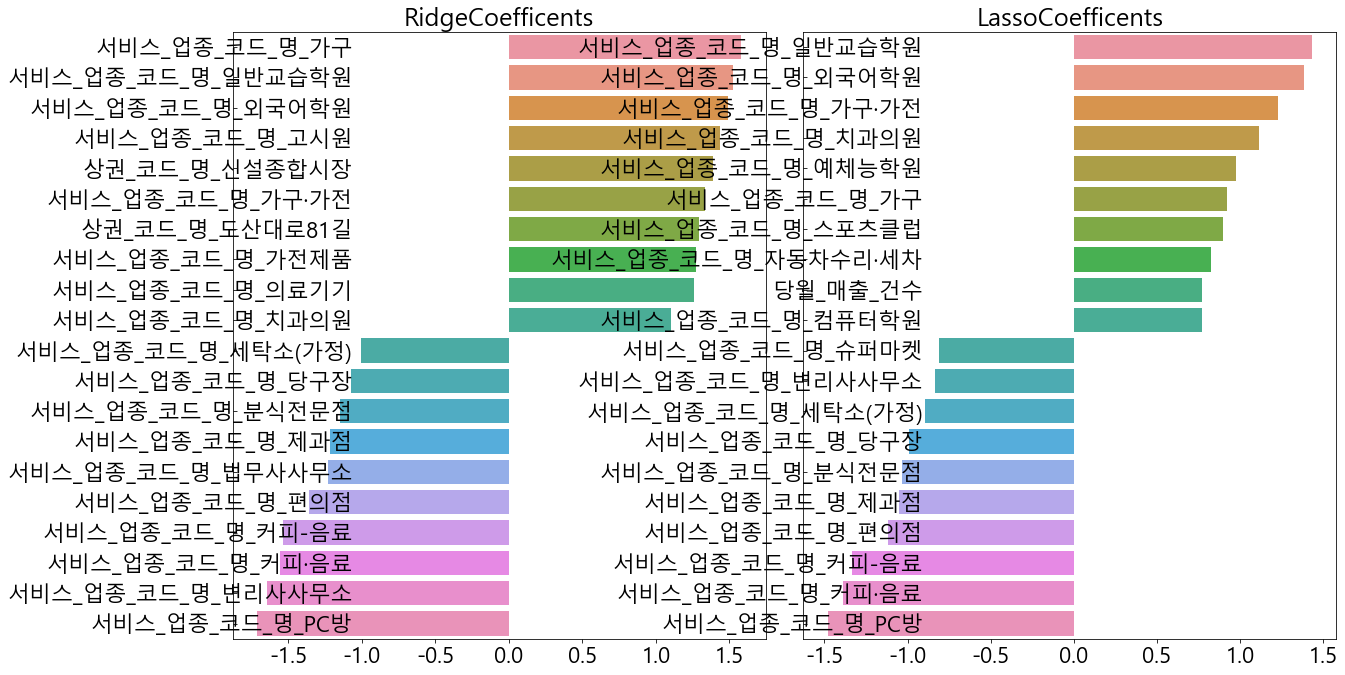

In [63]:
models = [best_ridge, best_lasso]

visualize_coef(models)